In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/twinkle0705/state-wise-power-consumption-in-india")

Skipping, found downloaded files in "./state-wise-power-consumption-in-india" (use force=True to force download)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data1=pd.read_csv('/content/state-wise-power-consumption-in-india/dataset_tk.csv')

In [ ]:
data1.columns

Index(['Unnamed: 0', 'Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP',
       'Uttarakhand', 'HP', 'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat',
       'MP', 'Maharashtra', 'Goa', 'DNH', 'Andhra Pradesh', 'Telangana',
       'Karnataka', 'Kerala', 'Tamil Nadu', 'Pondy', 'Bihar', 'Jharkhand',
       'Odisha', 'West Bengal', 'Sikkim', 'Arunachal Pradesh', 'Assam',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura'],
      dtype='object')

In [ ]:
data2=pd.read_csv('/content/state-wise-power-consumption-in-india/long_data_.csv')

In [ ]:
data2.columns

Index(['States', 'Regions', 'latitude', 'longitude', 'Dates', 'Usage'], dtype='object')

In [ ]:
data1.head()

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3


In [ ]:
data2.head()

,States,Regions,latitude,longitude,Dates,Usage
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9
1,Haryana,NR,28.450006,77.019991,02/01/2019 00:00:00,130.3
2,Rajasthan,NR,26.449999,74.639981,02/01/2019 00:00:00,234.1
3,Delhi,NR,28.669993,77.230004,02/01/2019 00:00:00,85.8
4,UP,NR,27.599981,78.050006,02/01/2019 00:00:00,313.9


#Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data1.drop('Unnamed: 0',axis=1,inplace=True)
data1.head(2)


,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,78.7,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,78.8,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6


In [ ]:
data1=data1.melt(var_name='States',value_name='Power_Consumption')
merged_data=pd.merge(data2,data1,on='States')

In [ ]:
merged_data.head()

,States,Regions,latitude,longitude,Dates,Usage,Power_Consumption
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9,119.9
1,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9,121.9
2,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9,118.8
3,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9,121.0
4,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9,121.4


In [ ]:
merged_data.dropna()

,States,Regions,latitude,longitude,Dates,Usage,Power_Consumption
0,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9,119.9
1,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9,121.9
2,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9,118.8
3,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9,121.0
4,Punjab,NR,31.519974,75.980003,02/01/2019 00:00:00,119.9,121.4
...,...,...,...,...,...,...,...
8349292,Tripura,NER,23.835404,91.279999,05/12/2020 00:00:00,3.3,2.4
8349293,Tripura,NER,23.835404,91.279999,05/12/2020 00:00:00,3.3,3.3
8349294,Tripura,NER,23.835404,91.279999,05/12/2020 00:00:00,3.3,3.6
8349295,Tripura,NER,23.835404,91.279999,05/12/2020 00:00:00,3.3,3.3


In [ ]:
merged_data['Dates'] = pd.to_datetime(merged_data['Dates'])
merged_data['Year'] = merged_data['Dates'].dt.year
merged_data['Month'] = merged_data['Dates'].dt.month
merged_data['Day'] = merged_data['Dates'].dt.day

In [ ]:

x=merged_data[['latitude', 'longitude', 'Year', 'Month', 'Day']]
y=merged_data['Power_Consumption']


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
print("X_train Shape: ",x_train.shape)
print("y_train Shape: ",y_train.shape)
print("X_test Shape: ",x_test.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (6679437, 5)
y_train Shape:  (6679437,)
X_test Shape:  (1669860, 5)
y_test Shape:  (1669860,)


In [ ]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
print(x_train_scaled)

[[ 0.40500254  1.69766013 -0.63321753 -1.33302957  1.30405176]
 [-1.25034949 -1.0993162  -0.63321753  1.57511534 -0.87842854]
 [-0.82404098 -0.38261983 -0.63321753 -1.04221508 -0.76356115]
 ...
 [ 0.67609506  0.93981591 -0.63321753  0.41185737  0.04051054]
 [ 0.58119103  1.7114527  -0.63321753  0.99348636  0.72971484]
 [ 0.67609506  0.93981591 -0.63321753 -1.33302957 -0.99329592]]


In [ ]:
print(x_test_scaled)

[[-0.47358173 -1.20974018  1.57923613 -0.75140059  0.49998007]
 [ 0.85776501 -0.6581082  -0.63321753  0.12104288 -1.1081633 ]
 [-1.25034949 -1.0993162  -0.63321753  0.99348636  0.15537792]
 ...
 [ 1.67120471 -0.76558456 -0.63321753  0.12104288 -1.56763284]
 [ 0.89355422 -0.62917013 -0.63321753  1.57511534 -1.22303069]
 [ 1.22706558 -0.69117621 -0.63321753 -0.4605861  -0.64869377]]


#Selecting and Developing the Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
linear_regression=LinearRegression()
random_forest=RandomForestRegressor(n_estimators=100,random_state=42)


In [ ]:
linear_regression.fit(x_train_scaled,y_train)
random_forest.fit(x_train_scaled,y_train)

RandomForestRegressor(random_state=42)

#Evaluate Models

##Predictions

In [ ]:
lr_predict = linear_regression.predict(x_test_scaled)

In [ ]:
rf_predict=random_forest.predict(x_test_scaled)

In [ ]:
print(lr_predict)

[181.48457091 124.45574342 190.01524948 ... 115.12866153 122.16254758
 119.29795374]


In [ ]:
print(rf_predict)

[ 16.59067768 138.05866048  11.11107292 ...  44.24220811  83.34035255
   4.0932604 ]


##Evaluations

In [ ]:
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, lr_predict)))
print("Linear Regression R^2:", r2_score(y_test, lr_predict))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_predict)))
print("Random Forest R^2:", r2_score(y_test, rf_predict))

Linear Regression RMSE: 96.98955035315228
Linear Regression R^2: 0.30212757449558825
Random Forest RMSE: 24.30568162207604
Random Forest R^2: 0.9561729987184644


#Visualize Actual Vs. Predicted


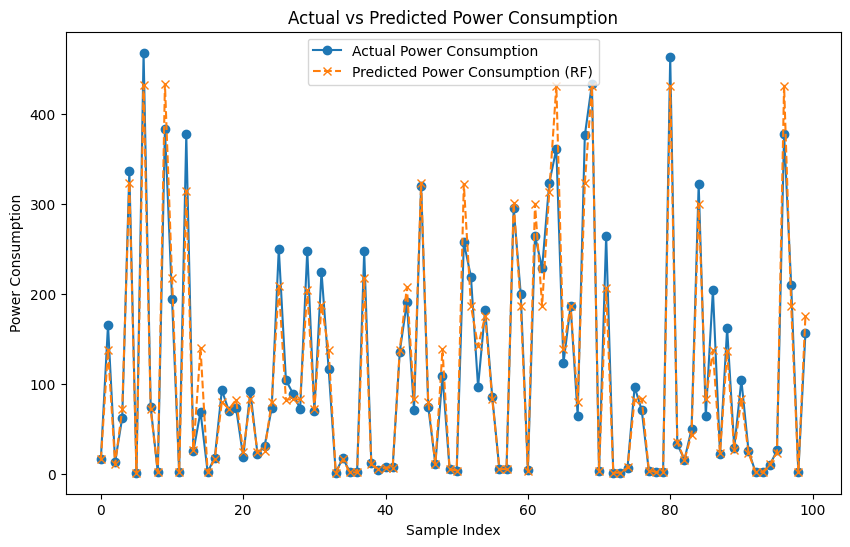

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label='Actual Power Consumption', marker='o')
plt.plot(rf_predict[:100], label='Predicted Power Consumption (RF)', linestyle='--', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Power Consumption')
plt.title('Actual vs Predicted Power Consumption')
plt.legend()
plt.show()

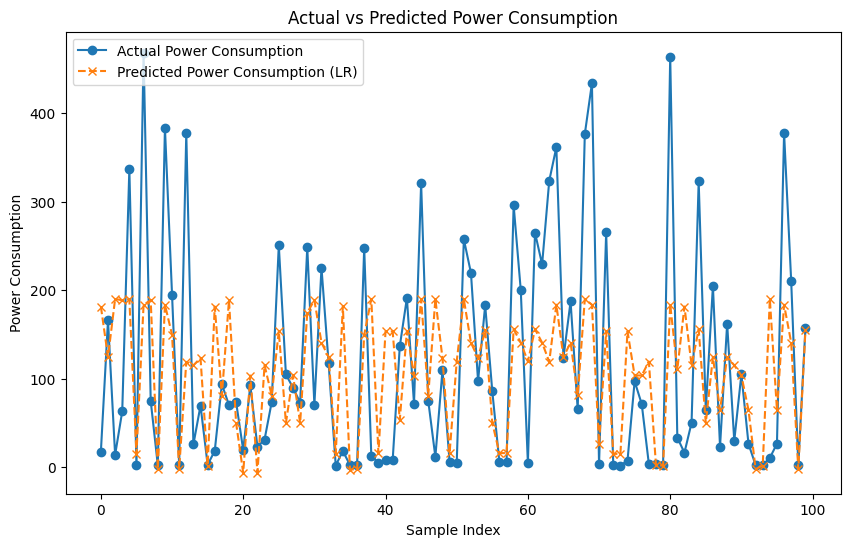

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label='Actual Power Consumption', marker='o')
plt.plot(lr_predict[:100], label='Predicted Power Consumption (LR)', linestyle='--', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Power Consumption')
plt.title('Actual vs Predicted Power Consumption')
plt.legend()
plt.show()